In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv'
df = pd.read_csv(url)

X = df.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [20]:
X.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [21]:
X.corr()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
W0,1.000000,0.928234,0.927777,0.932767,0.941081,0.934089,0.937892,0.932157,0.939375,0.935207,...,0.924209,0.920664,0.929558,0.928580,0.926545,0.917750,0.922307,0.911004,0.898149,0.822683
W1,0.928234,1.000000,0.935928,0.932626,0.929931,0.935433,0.937663,0.931325,0.939928,0.939382,...,0.926086,0.915918,0.927948,0.930329,0.922710,0.923604,0.918331,0.918923,0.895836,0.818161
W2,0.927777,0.935928,1.000000,0.936166,0.929344,0.936200,0.928048,0.925576,0.929406,0.939855,...,0.925752,0.920527,0.927927,0.934803,0.927475,0.916076,0.920489,0.918131,0.874308,0.807270
W3,0.932767,0.932626,0.936166,1.000000,0.932885,0.935660,0.939276,0.935071,0.942684,0.939762,...,0.930761,0.924082,0.925560,0.938476,0.934241,0.927394,0.931502,0.923405,0.889467,0.812266
W4,0.941081,0.929931,0.929344,0.932885,1.000000,0.932268,0.932126,0.927831,0.934932,0.938131,...,0.940840,0.920427,0.926165,0.925251,0.920623,0.919622,0.927786,0.909879,0.896266,0.816382
W5,0.934089,0.935433,0.936200,0.935660,0.932268,1.000000,0.935229,0.922236,0.928715,0.937605,...,0.933291,0.926531,0.929967,0.929692,0.923105,0.920455,0.917065,0.917849,0.892928,0.819957
W6,0.937892,0.937663,0.928048,0.939276,0.932126,0.935229,1.000000,0.931222,0.932895,0.939389,...,0.926344,0.926281,0.931780,0.927665,0.924439,0.925401,0.934044,0.918286,0.892226,0.810535
W7,0.932157,0.931325,0.925576,0.935071,0.927831,0.922236,0.931222,1.000000,0.931905,0.938458,...,0.923298,0.919647,0.932342,0.935747,0.928093,0.919475,0.925292,0.915145,0.886685,0.808500
W8,0.939375,0.939928,0.929406,0.942684,0.934932,0.928715,0.932895,0.931905,1.000000,0.939157,...,0.930471,0.920669,0.924766,0.943363,0.928463,0.922072,0.926627,0.917440,0.894291,0.823335
W9,0.935207,0.939382,0.939855,0.939762,0.938131,0.937605,0.939389,0.938458,0.939157,1.000000,...,0.937546,0.929646,0.933662,0.939534,0.938517,0.935289,0.929693,0.915446,0.899946,0.826727


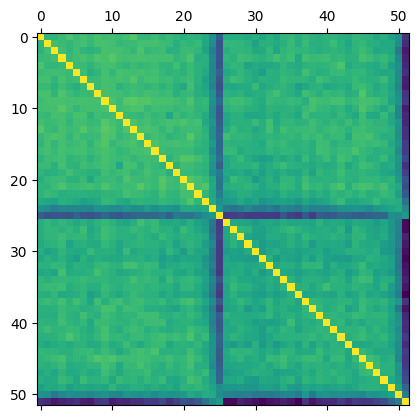

In [22]:
plt.matshow(X.corr())
plt.show()

In [3]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

In [30]:
scaled_X.to_excel(r'output.xlsx', sheet_name='aaaa', index = False)

c:\Users\80400015\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\80400015\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\80400015\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\80400015\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

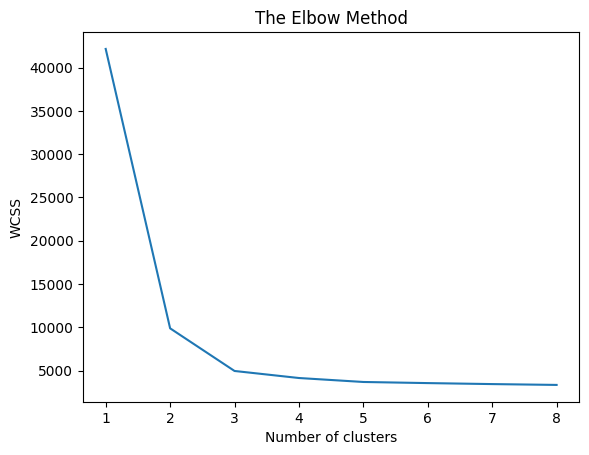

In [26]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(scaled_X) 
# y_kmeans = kmeans.fit_predict(scaled_X)


c:\Users\80400015\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

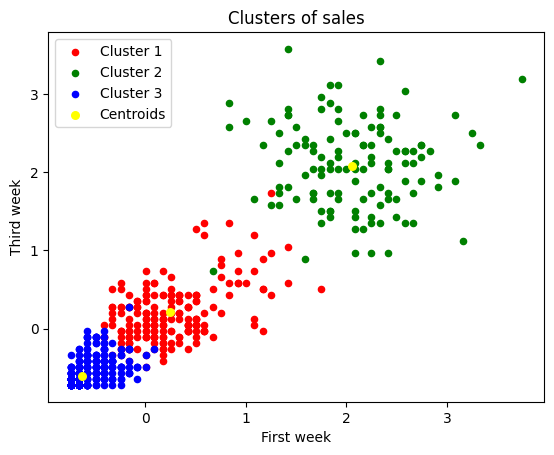

In [24]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()